<a href="https://colab.research.google.com/github/hygo2025/ciencia_de_dados/blob/main/trabalho_aglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install wordcloud
# !pip install mlxtend
# !pip install nltk
# !pip install scikit-learn
# !pip install seaborn
# !pip install unidecode
# !pip install plotly
# !pip install mlxtend


In [ ]:
import csv
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import fpgrowth
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import warnings
import unidecode
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from nltk import flatten
from nltk.probability import FreqDist

warnings.filterwarnings("ignore")
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /Users/hygo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("filmes.csv")
df = df.sample(frac=0.4, random_state=42)

In [ ]:
df['processed_sinopse'] = df['sinopse']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12143 entries, 21377 to 22340
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genres             12143 non-null  object 
 1   averageRating      12143 non-null  float64
 2   numVotes           12143 non-null  int64  
 3   sinopse            12143 non-null  object 
 4   primaryTitle       12143 non-null  object 
 5   startYear          12143 non-null  int64  
 6   runtimeMinutes     12143 non-null  object 
 7   actors_names       12143 non-null  object 
 8   directors_names    12143 non-null  object 
 9   processed_sinopse  12143 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
df['processed_sinopse'] = df['sinopse']

In [ ]:
df['processed_sinopse']

21377    Mike Braxton (Sam Jones) a St. Louis cop, rece...
16221    Fervidly dark lovesick horror inspired by the ...
8341     A couple struggles to visit all four of their ...
14092    Chaos ensues when a lethal, airborne virus inf...
12135    Josh's girlfriend wants to get married. Molly'...
                               ...                        
12957    Set in the golden era of Grand Prix Racing '1'...
25771    After losing his father to a bunch of scheming...
339      A young street hustler attempts to escape the ...
3480     Semi-true story of the Hollywood murder that o...
22340    A witty comic book reviewer gears up to save t...
Name: processed_sinopse, Length: 12143, dtype: object

In [ ]:
def lower_clean(text):
 text = text.lower()
 text = re.sub(r'[^a-z\s]', '', text)
 return text

df['processed_sinopse'] = df['processed_sinopse'].apply(lower_clean)
df['processed_sinopse']

21377    mike braxton sam jones a st louis cop receives...
16221    fervidly dark lovesick horror inspired by the ...
8341     a couple struggles to visit all four of their ...
14092    chaos ensues when a lethal airborne virus infe...
12135    joshs girlfriend wants to get married mollys b...
                               ...                        
12957    set in the golden era of grand prix racing  te...
25771    after losing his father to a bunch of scheming...
339      a young street hustler attempts to escape the ...
3480     semitrue story of the hollywood murder that oc...
22340    a witty comic book reviewer gears up to save t...
Name: processed_sinopse, Length: 12143, dtype: object

In [ ]:
def unidecode_text(text):
 return unidecode.unidecode(text)

df['processed_sinopse'] = df['processed_sinopse'].apply(unidecode_text)
df['processed_sinopse']

21377    mike braxton sam jones a st louis cop receives...
16221    fervidly dark lovesick horror inspired by the ...
8341     a couple struggles to visit all four of their ...
14092    chaos ensues when a lethal airborne virus infe...
12135    joshs girlfriend wants to get married mollys b...
                               ...                        
12957    set in the golden era of grand prix racing  te...
25771    after losing his father to a bunch of scheming...
339      a young street hustler attempts to escape the ...
3480     semitrue story of the hollywood murder that oc...
22340    a witty comic book reviewer gears up to save t...
Name: processed_sinopse, Length: 12143, dtype: object

In [ ]:
def tokenize(text: str) -> list:
 return word_tokenize(text)

df['processed_sinopse'] = df['processed_sinopse'].apply(tokenize)
df['processed_sinopse']

21377    [mike, braxton, sam, jones, a, st, louis, cop,...
16221    [fervidly, dark, lovesick, horror, inspired, b...
8341     [a, couple, struggles, to, visit, all, four, o...
14092    [chaos, ensues, when, a, lethal, airborne, vir...
12135    [joshs, girlfriend, wants, to, get, married, m...
                               ...                        
12957    [set, in, the, golden, era, of, grand, prix, r...
25771    [after, losing, his, father, to, a, bunch, of,...
339      [a, young, street, hustler, attempts, to, esca...
3480     [semitrue, story, of, the, hollywood, murder, ...
22340    [a, witty, comic, book, reviewer, gears, up, t...
Name: processed_sinopse, Length: 12143, dtype: object

In [ ]:
stop_words_english = set(stopwords.words('english'))
def remove_stopwords(tokens: list) -> list:
 return [word for word in tokens if word not in stop_words_english]

df['processed_sinopse'] = df['processed_sinopse'].apply(remove_stopwords)
df['processed_sinopse']

21377    [mike, braxton, sam, jones, st, louis, cop, re...
16221    [fervidly, dark, lovesick, horror, inspired, r...
8341     [couple, struggles, visit, four, divorced, par...
14092    [chaos, ensues, lethal, airborne, virus, infec...
12135    [joshs, girlfriend, wants, get, married, molly...
                               ...                        
12957    [set, golden, era, grand, prix, racing, tells,...
25771    [losing, father, bunch, scheming, politicians,...
339      [young, street, hustler, attempts, escape, rig...
3480     [semitrue, story, hollywood, murder, occurred,...
22340    [witty, comic, book, reviewer, gears, save, wo...
Name: processed_sinopse, Length: 12143, dtype: object

In [ ]:
def lemmatize(tokens: list) -> list:
 lemmatizer = WordNetLemmatizer()
 return [lemmatizer.lemmatize(word) for word in tokens]


df['processed_sinopse'] = df['processed_sinopse'].apply(lemmatize)
df['processed_sinopse']



21377    [mike, braxton, sam, jones, st, louis, cop, re...
16221    [fervidly, dark, lovesick, horror, inspired, r...
8341     [couple, struggle, visit, four, divorced, pare...
14092    [chaos, ensues, lethal, airborne, virus, infec...
12135    [joshs, girlfriend, want, get, married, molly,...
                               ...                        
12957    [set, golden, era, grand, prix, racing, tell, ...
25771    [losing, father, bunch, scheming, politician, ...
339      [young, street, hustler, attempt, escape, rigo...
3480     [semitrue, story, hollywood, murder, occurred,...
22340    [witty, comic, book, reviewer, gear, save, wor...
Name: processed_sinopse, Length: 12143, dtype: object

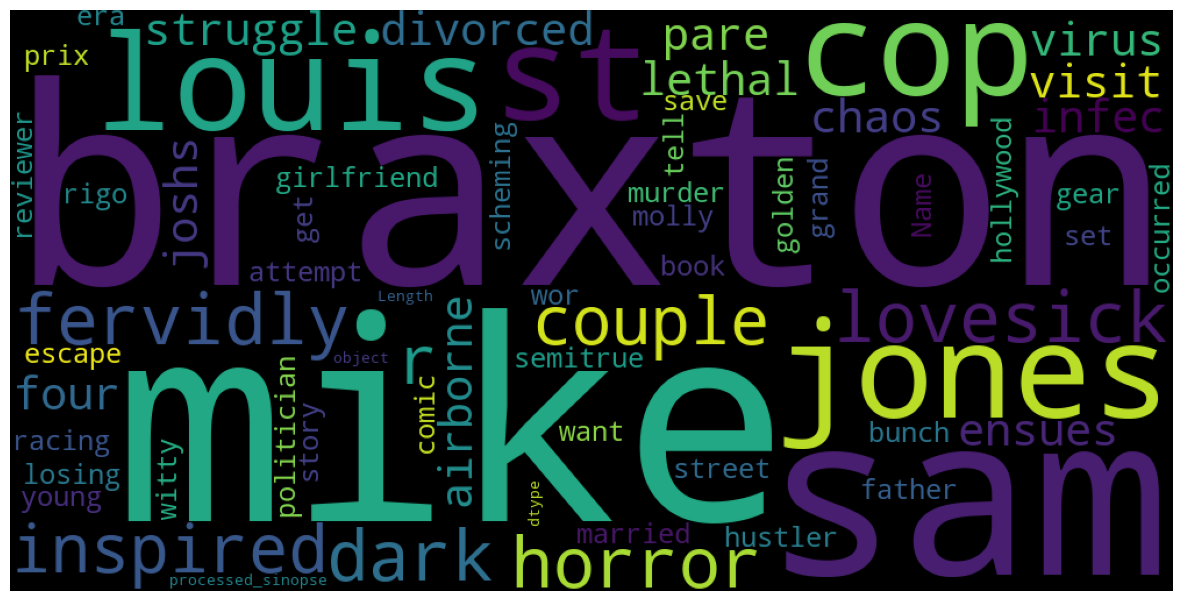

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_words_english).generate(str(df['processed_sinopse']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
genres=pd.value_counts(df.genres)

print(f"Existem {len(genres)} generos diferentes no dataset")

print('-----------------------------------------------------')
print(genres)

Existem 61 generos diferentes no dataset
-----------------------------------------------------
genres
Romance                   2754
Crime                     1715
Horror                    1580
Action                    1450
Crime,Action               841
                          ... 
Sport,Romance,Action         1
Musical,Romance,Crime        1
Musical,Romance,Action       1
Sport,Sci-Fi,Action          1
Sci-Fi,Biography             1
Name: count, Length: 61, dtype: int64


In [ ]:
top_genres = pd.DataFrame(genres[:6]).reset_index()
top_genres.columns = ['genres', 'number_of_movies']
top_genres

,genres,number_of_movies
0,Romance,2754
1,Crime,1715
2,Horror,1580
3,Action,1450
4,"Crime,Action",841
5,Family,677


Text(0.5, 1.0, 'Top 6 genres and their frequency')

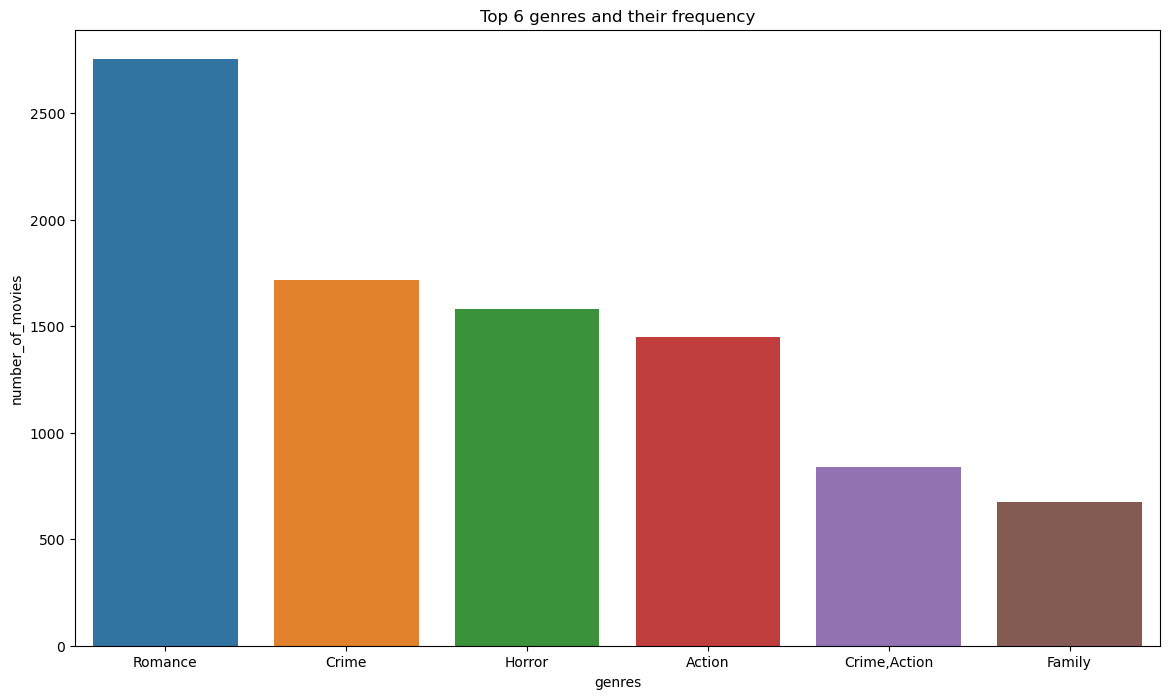

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,8))


sns.barplot(top_genres, x="genres", y="number_of_movies")
plt.title('Top 6 genres and their frequency')

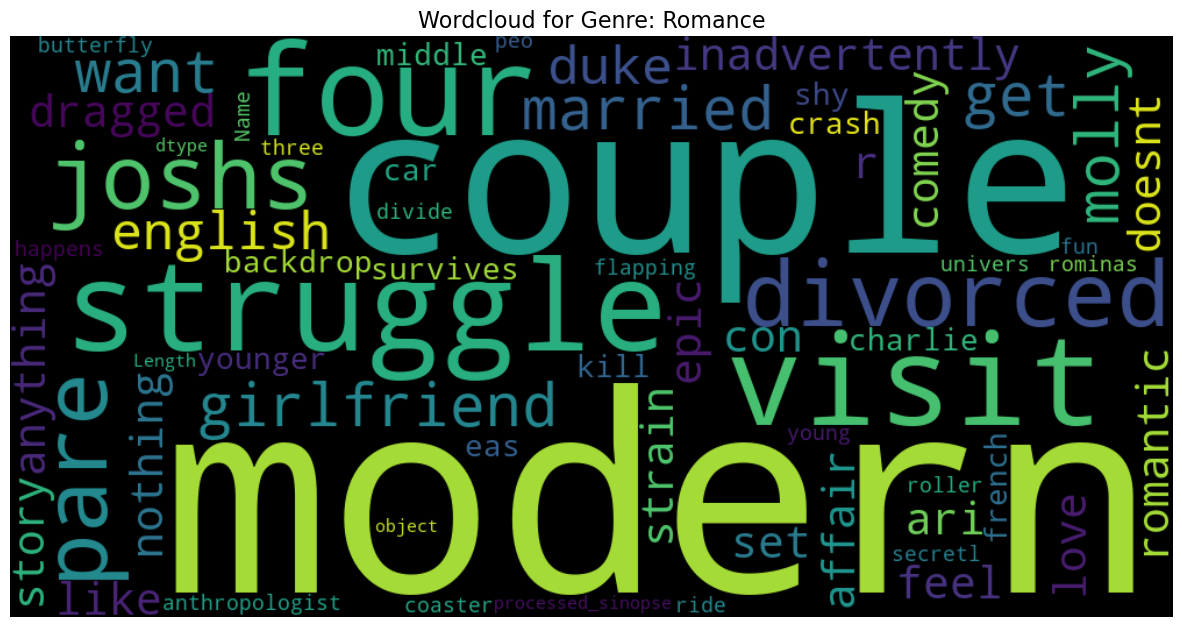

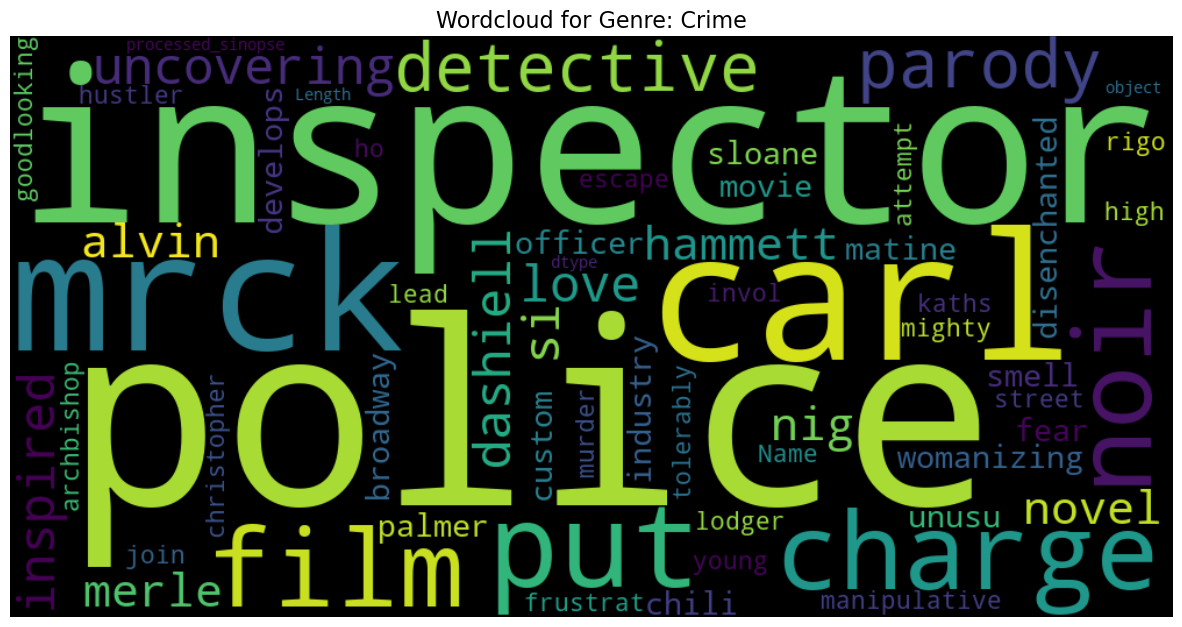

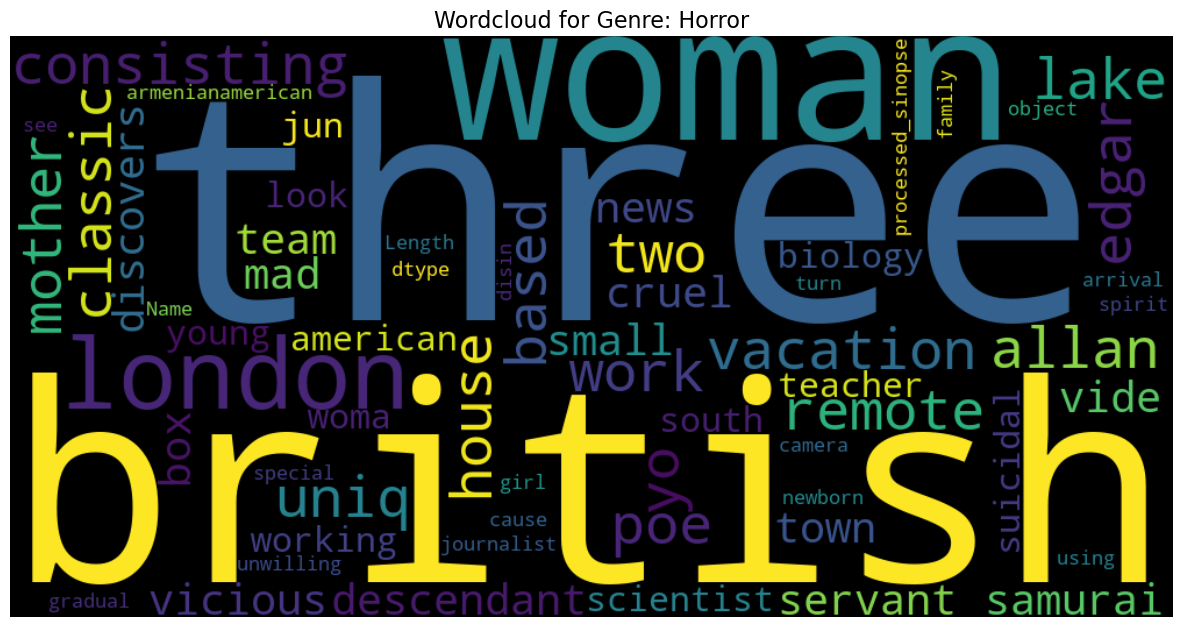

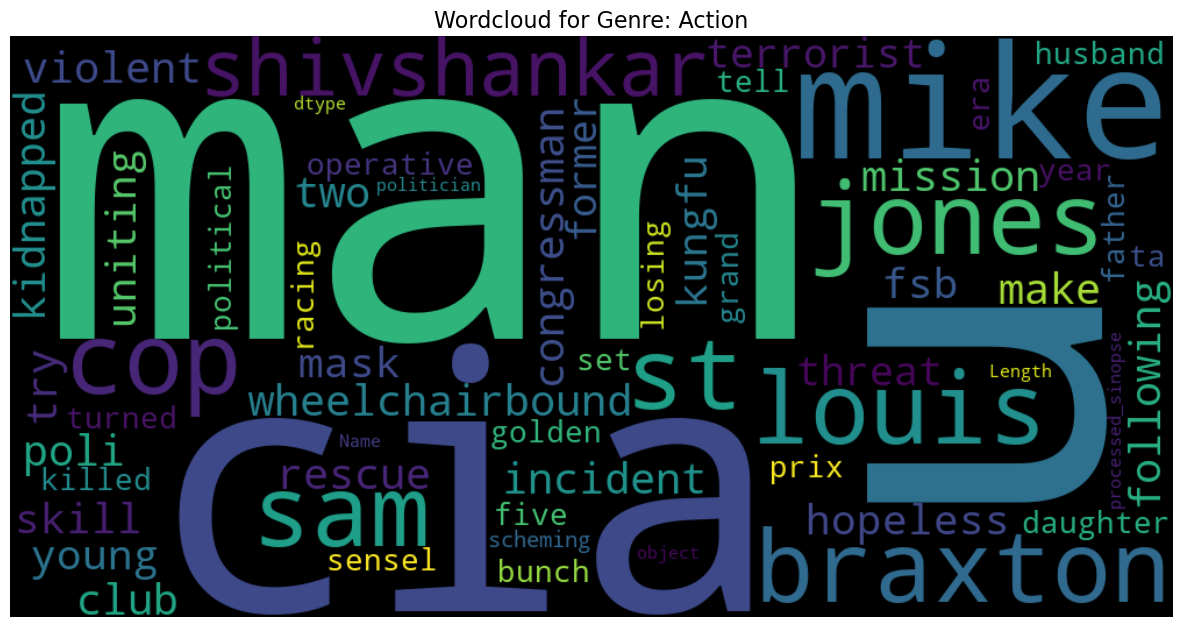

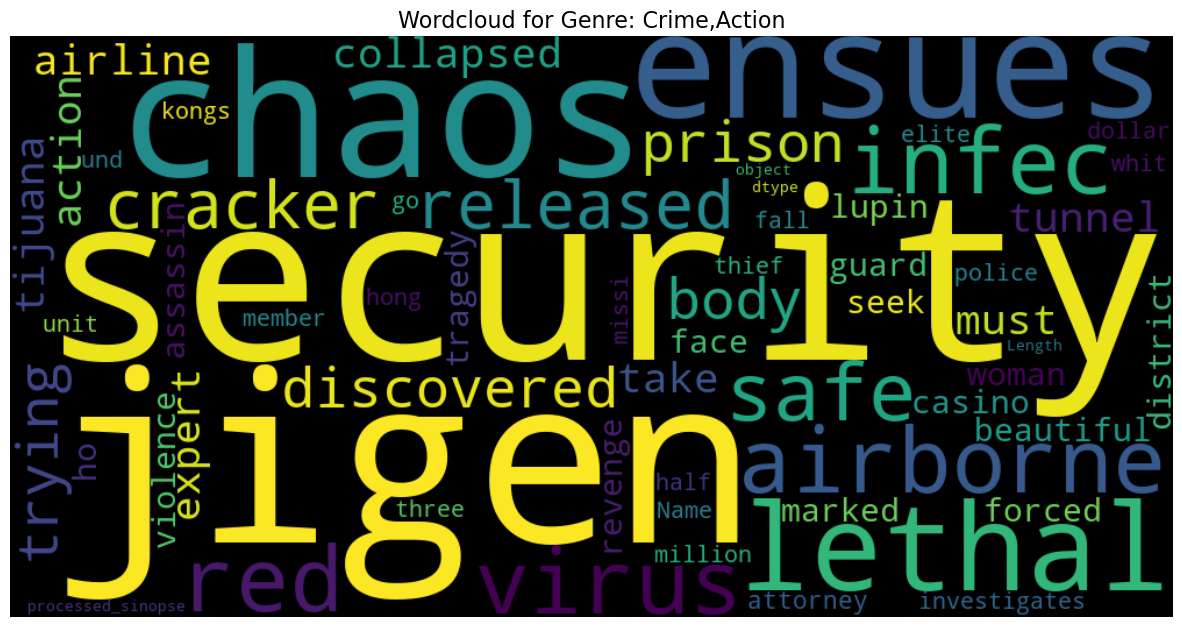

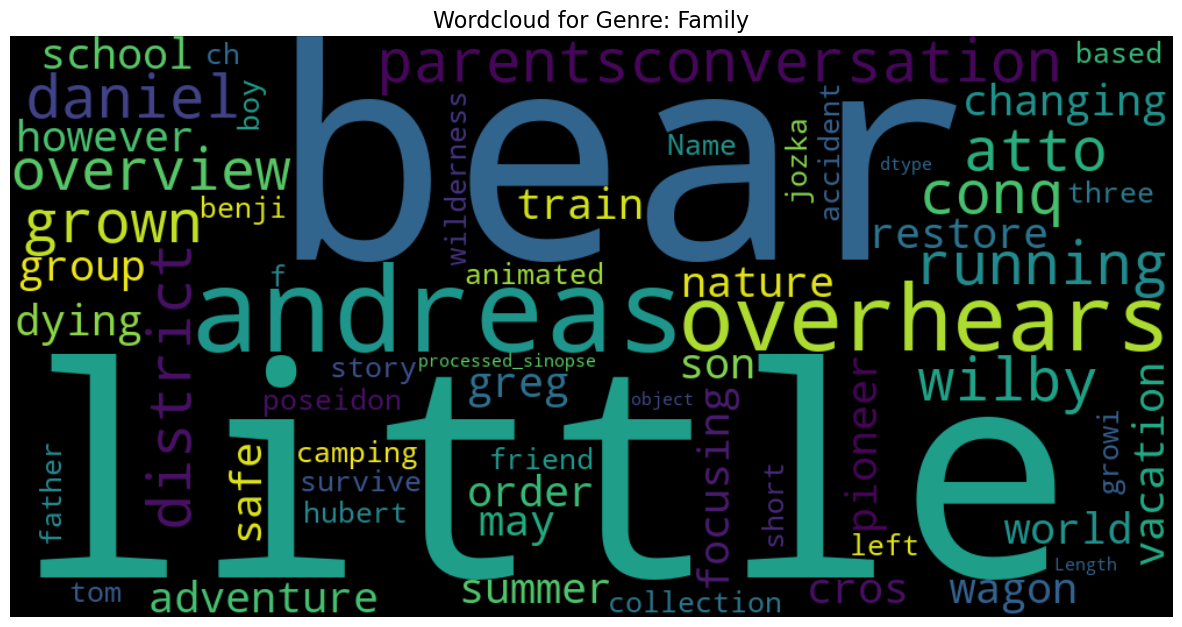

In [ ]:
for genre in top_genres['genres'].tolist():
    genre_df = df[df['genres'] == genre]
    wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_words_english).generate(str(genre_df['processed_sinopse']))

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud for Genre: {genre}", fontsize=16)
    plt.show()


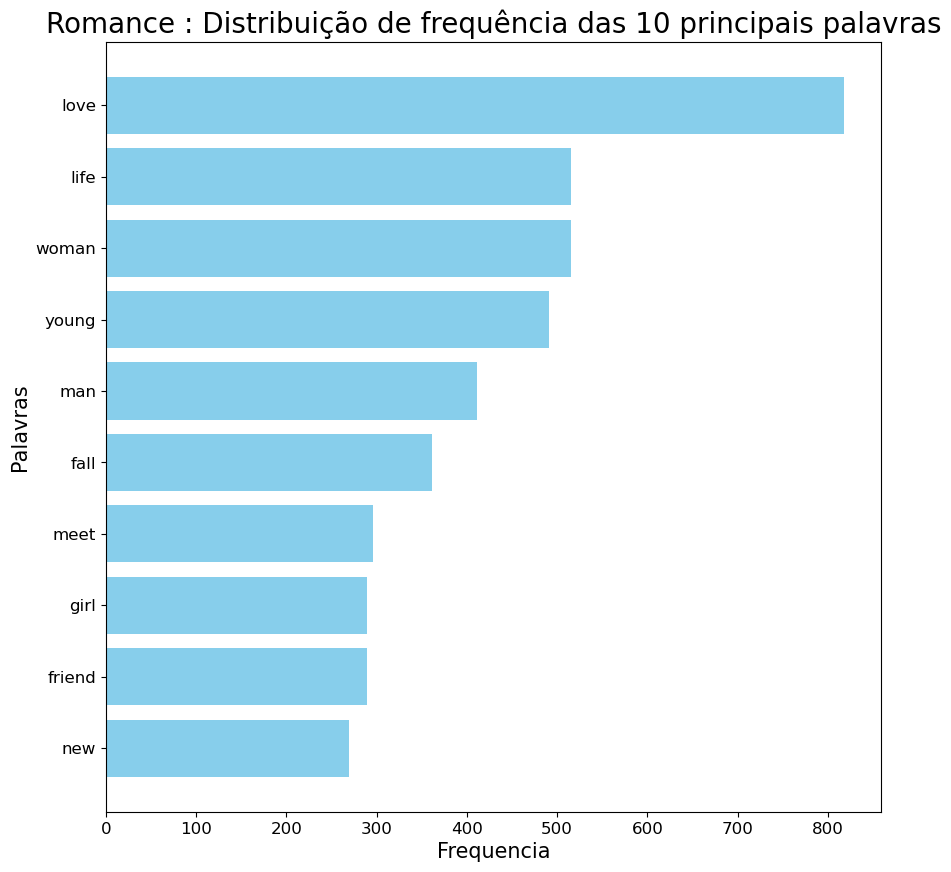

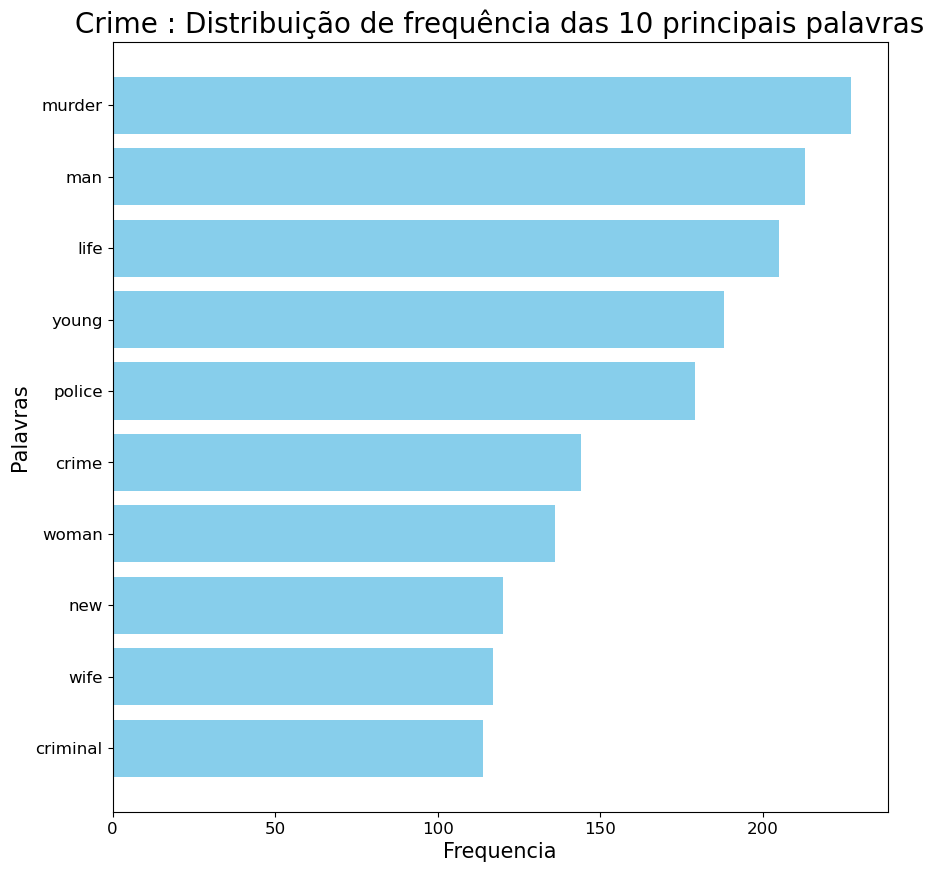

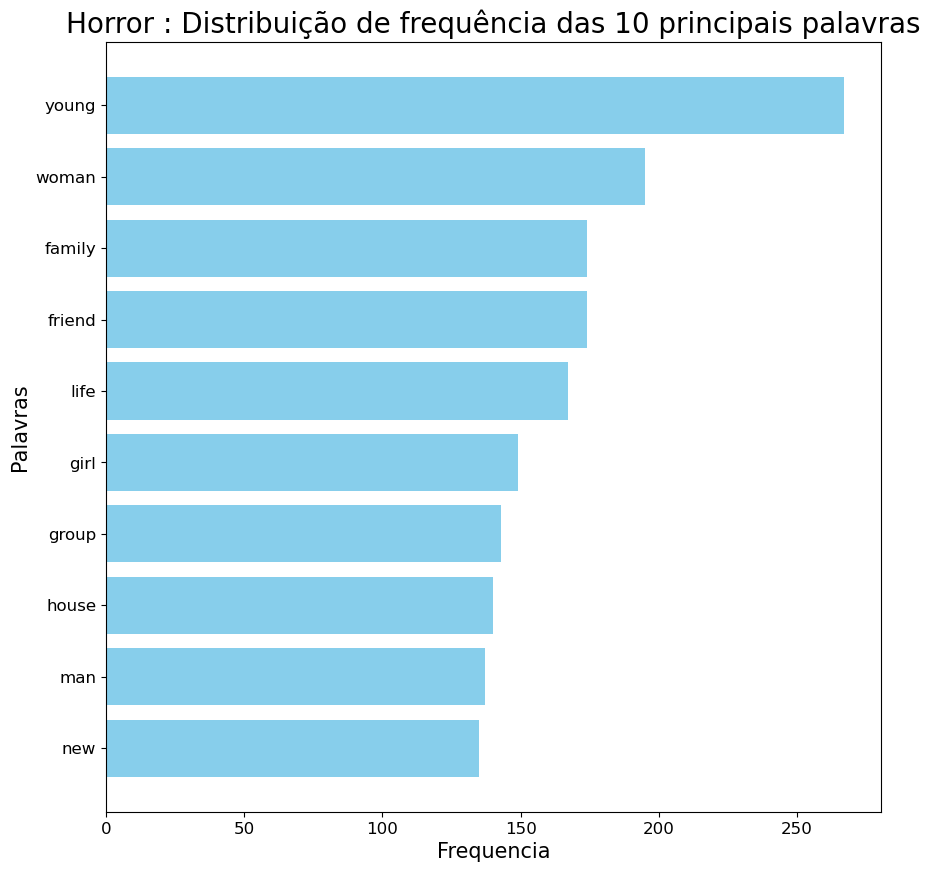

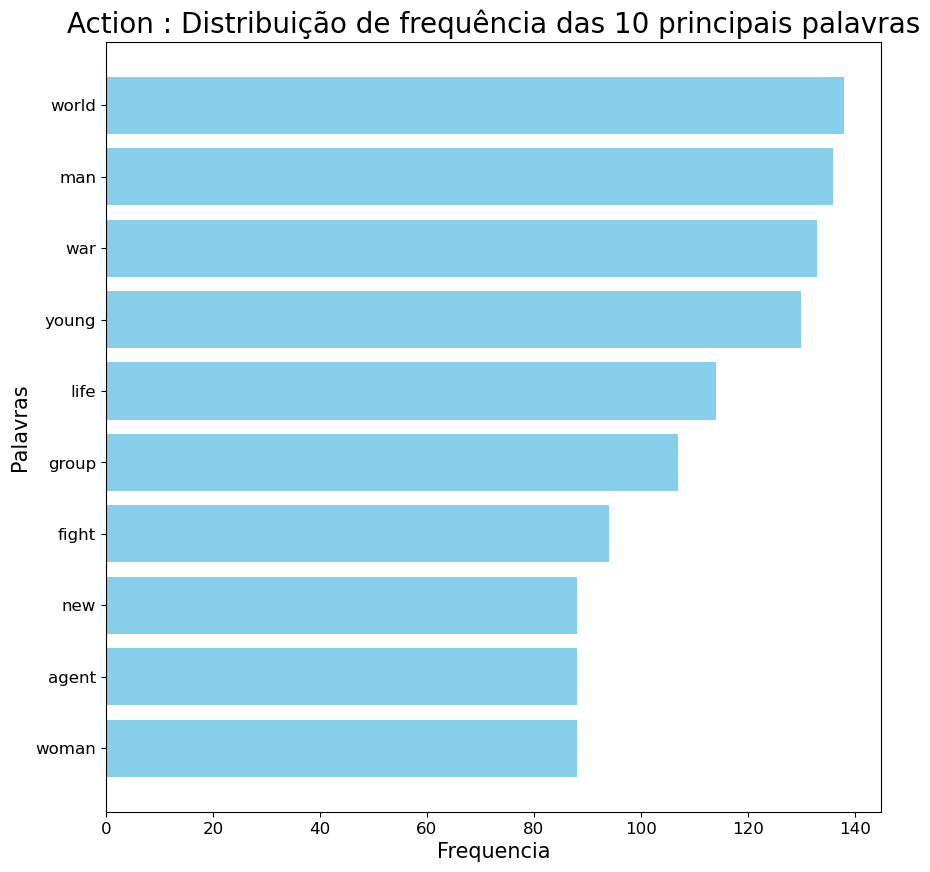

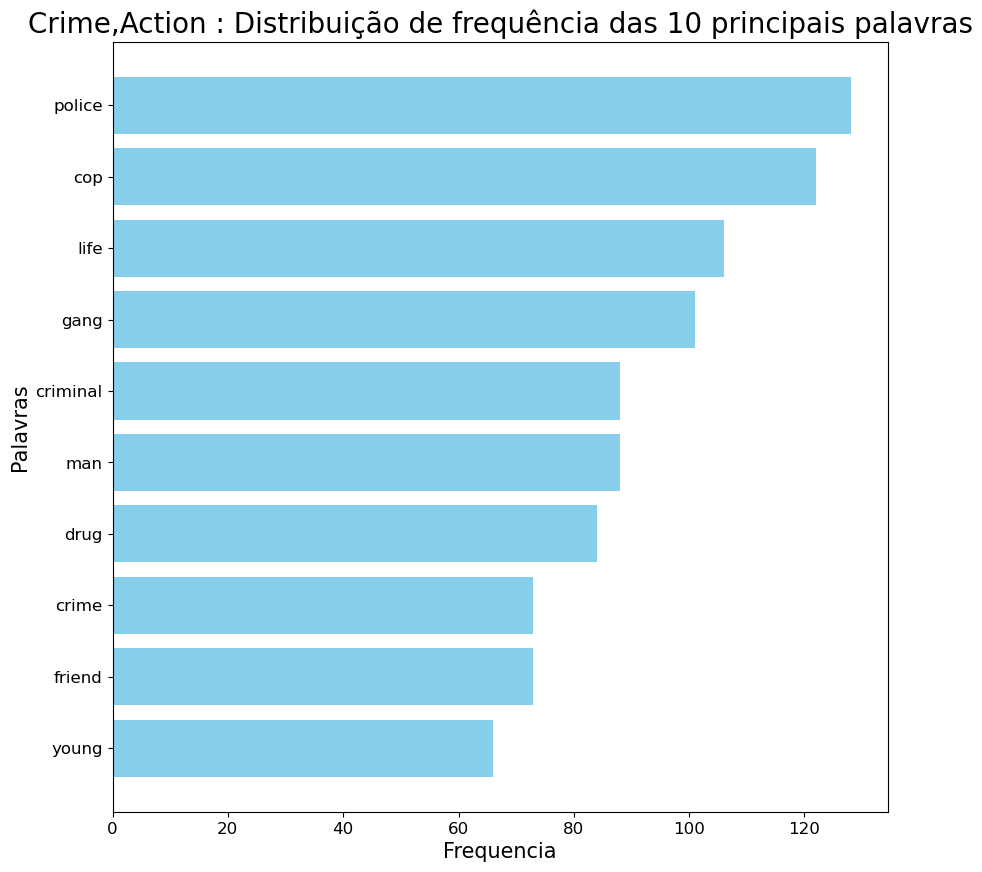

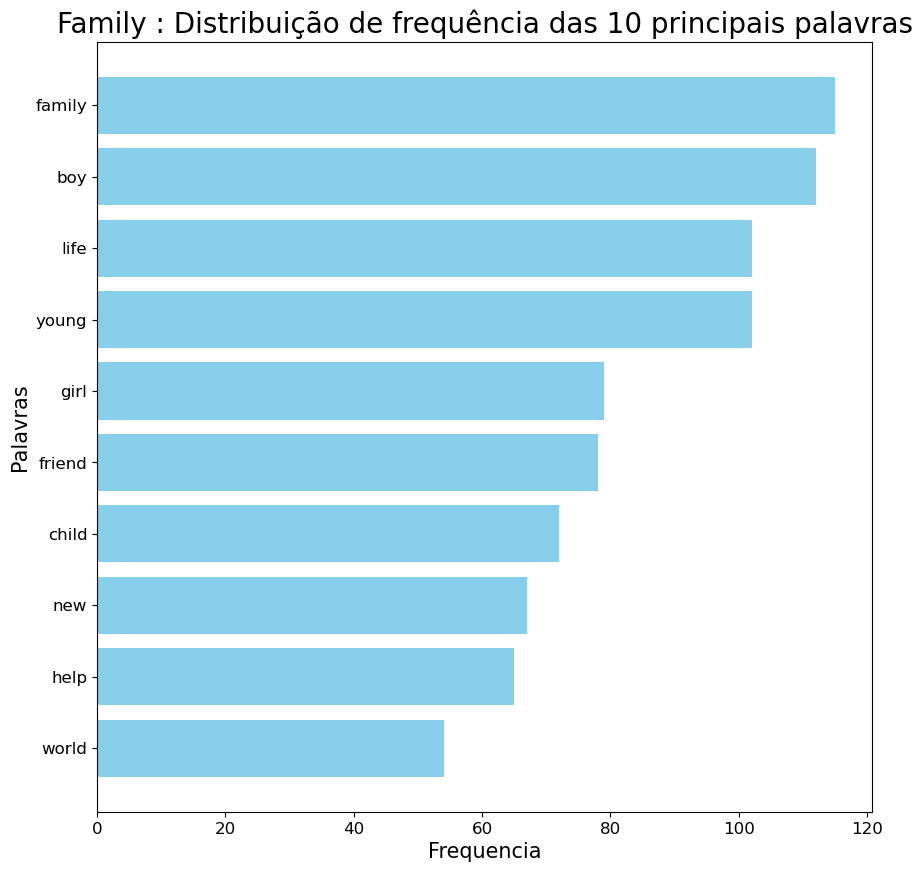

In [ ]:
for genre in top_genres['genres'].tolist():
    genre_df = df[df['genres'] == genre]

    count = CountVectorizer(stop_words='english')
    docs = count.fit_transform(flatten(genre_df['processed_sinopse'].to_list()))
    features = count.get_feature_names_out()

    word_count_df = pd.DataFrame(docs.toarray().sum(axis=0), index=features, columns=['count'])
    word_count_df = word_count_df.sort_values(by='count', ascending=False)

    # Selecionando as top 10 palavras mais frequentes
    top_words = word_count_df.head(10)

    # Visualizando as top 10 palavras com Matplotlib
    fig = plt.figure(figsize=(10, 10))
    plt.barh(top_words.index, top_words['count'], color='skyblue')
    plt.title(f'{genre} : Distribuição de frequência das 10 principais palavras', size=20)
    plt.xlabel('Frequencia', fontsize=15)
    plt.ylabel('Palavras', fontsize=15)
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()



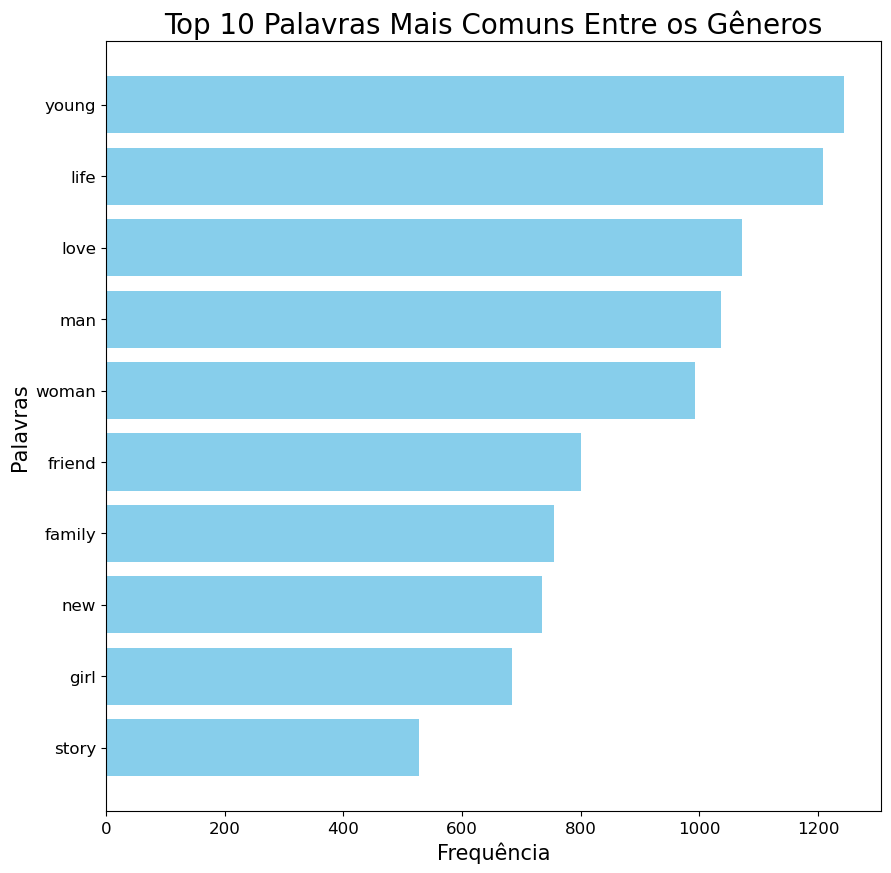

In [ ]:
word_counts = {}

for genre in top_genres['genres'].tolist():
    genre_df = df[df['genres'] == genre]

    count = CountVectorizer(stop_words='english')
    docs = count.fit_transform(flatten(genre_df['processed_sinopse'].to_list()))
    features = count.get_feature_names_out()
    word_count_df = pd.DataFrame(docs.toarray().sum(axis=0), index=features, columns=['count'])
    word_counts[genre] = word_count_df

all_words = pd.DataFrame()

for genre, word_count_df in word_counts.items():
    all_words = pd.concat([all_words, word_count_df])

common_words = all_words.groupby(all_words.index).sum()

common_words = common_words.sort_values(by='count', ascending=False)

top_common_words = common_words.head(10)

fig = plt.figure(figsize=(10, 10))
plt.barh(top_common_words.index, top_common_words['count'], color='skyblue')
plt.title('Top 10 Palavras Mais Comuns Entre os Gêneros', size=20)
plt.xlabel('Frequência', fontsize=15)
plt.ylabel('Palavras', fontsize=15)
plt.gca().invert_yaxis()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
def my_analyzer(text):
    return text.split()

cv = CountVectorizer(ngram_range=(1, 3), analyzer=my_analyzer)
tfidf_matrix = cv.fit_transform(
    df['processed_sinopse'].map(str).tolist()
)

terms = cv.get_feature_names_out()
term_sums = tfidf_matrix.sum(axis=0).A1  # Somando as ocorrências
term_counts = []

for i in range(len(terms)):
    term_counts.append([terms[i], term_sums[i]])

term_counts.sort(key=lambda x: x[1], reverse=True)

# Exibindo as top 400 palavras mais frequentes
for i in range(50):
    print(f"{i+1}: {term_counts[i][0]} (Frequência: {term_counts[i][1]})")


1: 'life', (Frequência: 1411)
2: 'find', (Frequência: 1375)
3: 'love', (Frequência: 1167)
4: 'young', (Frequência: 1123)
5: 'man', (Frequência: 1120)
6: 'one', (Frequência: 1114)
7: 'woman', (Frequência: 1097)
8: 'get', (Frequência: 1005)
9: 'new', (Frequência: 914)
10: 'friend', (Frequência: 878)
11: 'family', (Frequência: 786)
12: 'take', (Frequência: 784)
13: 'girl', (Frequência: 779)
14: 'two', (Frequência: 751)
15: 'go', (Frequência: 664)
16: 'year', (Frequência: 655)
17: 'fall', (Frequência: 642)
18: 'world', (Frequência: 620)
19: 'must', (Frequência: 613)
20: 'story', (Frequência: 574)
21: 'try', (Frequência: 558)
22: 'meet', (Frequência: 555)
23: 'father', (Frequência: 539)
24: 'help', (Frequência: 518)
25: 'come', (Frequência: 503)
26: 'wife', (Frequência: 503)
27: 'becomes', (Frequência: 491)
28: 'murder', (Frequência: 483)
29: ['young', (Frequência: 453)
30: 'boy', (Frequência: 452)
31: 'make', (Frequência: 451)
32: 'time', (Frequência: 444)
33: 'school', (Frequência: 438)
3

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,3))

tfidf_matrix = tfidf_vect.fit_transform(df['processed_sinopse'].map(str).tolist())

terms = tfidf_vect.get_feature_names_out()
term_idf_sums = tfidf_matrix.sum(axis=0).A1  # Soma dos scores IDF

term_idf_scores = []
for i in range(len(terms)):
    term_idf_scores.append([terms[i], term_idf_sums[i]])

term_idf_scores = sorted(term_idf_scores, key=lambda x: x[1], reverse=True)


top_10_idf_words = term_idf_scores[:10]
print("Top 10 palavras com maiores scores de TF-IDF:")
for term, score in top_10_idf_words:
    print(f'{term}: {score}')


Top 10 palavras com maiores scores de TF-IDF:
young: 82.6593596084124
life: 81.49450668102274
man: 73.83316818539413
woman: 72.1664828340837
find: 70.47717877333592
love: 70.23828329109061
two: 62.24384478849154
one: 58.647160549822175
family: 55.96651355706075
new: 54.924659133358126


In [ ]:
df['processed_sinopse']

21377    [mike, braxton, sam, jones, st, louis, cop, re...
16221    [fervidly, dark, lovesick, horror, inspired, r...
8341     [couple, struggle, visit, four, divorced, pare...
14092    [chaos, ensues, lethal, airborne, virus, infec...
12135    [joshs, girlfriend, want, get, married, molly,...
                               ...                        
12957    [set, golden, era, grand, prix, racing, tell, ...
25771    [losing, father, bunch, scheming, politician, ...
339      [young, street, hustler, attempt, escape, rigo...
3480     [semitrue, story, hollywood, murder, occurred,...
22340    [witty, comic, book, reviewer, gear, save, wor...
Name: processed_sinopse, Length: 12143, dtype: object

In [ ]:
df['processed_sinopse'] = df['processed_sinopse'].apply(lambda x: ' '.join(x))
df['processed_sinopse']

21377    mike braxton sam jones st louis cop receives u...
16221    fervidly dark lovesick horror inspired reallif...
8341     couple struggle visit four divorced parent chr...
14092    chaos ensues lethal airborne virus infects pop...
12135    joshs girlfriend want get married molly boyfri...
                               ...                        
12957    set golden era grand prix racing tell story ge...
25771    losing father bunch scheming politician young ...
339      young street hustler attempt escape rigor temp...
3480     semitrue story hollywood murder occurred stars...
22340    witty comic book reviewer gear save world forc...
Name: processed_sinopse, Length: 12143, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, ngram_range=(1, 3))

print("Generating TFIDF sparse matrix...")
X_tfidf = vectorizer.fit_transform(df['processed_sinopse'])

# Converter a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Visualizar as primeiras linhas
tfidf_df.shape


Generating TFIDF sparse matrix...


(12143, 8286)

In [ ]:
svd = TruncatedSVD(n_components=2_000, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

cum_variance = np.cumsum(svd.explained_variance_ratio_)
threshold = 0.7  # Defina o limite desejado

if np.any(cum_variance > threshold):
    idx = np.argmax(cum_variance > threshold)
else:
    # Caso o limiar não seja atingido
    idx = len(cum_variance) - 1  # Índice do maior valor
    print(f"Variância acumulada máxima disponível: {cum_variance[idx]:.4f}")

print(idx)





In [ ]:
svd = TruncatedSVD(n_components=idx, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

In [ ]:
from sklearn.cluster import DBSCAN

for eps in [0.5,1,2,3,4,5,6,7,8,9,10,11]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(X_svd)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(X_svd, db.labels_, metric='euclidean')))

0.5 2: -0.040805101765770506
1 2: -7.84313894717366e-05


In [ ]:
# Criar o vetorizador TF-IDF

vectorizer = TfidfVectorizer(max_features=100_000, ngram_range=(1, 3))
print("Generating TFIDF sparse matrix...")
X_tfidf = vectorizer.fit_transform(df['processed_sinopse'])

# Converter a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Visualizar as primeiras linhas
tfidf_df.shape


# vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.9)

# print("Generating TFIDF sparse matrix...")
# X_tfidf = vectorizer.fit_transform(df["sinopse"])

In [ ]:
X_tfidf

In [ ]:
df.shape

In [ ]:
svd = TruncatedSVD(n_components=6_000, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

cum_variance = np.cumsum(svd.explained_variance_ratio_)
threshold = 0.7  # Defina o limite desejado

if np.any(cum_variance > threshold):
    idx = np.argmax(cum_variance > threshold)
else:
    # Caso o limiar não seja atingido
    idx = len(cum_variance) - 1  # Índice do maior valor
    print(f"Variância acumulada máxima disponível: {cum_variance[idx]:.4f}")


In [ ]:
if idx == 0:
    idx = 4000

print(f"O número de componentes para explicar 70% da variância é {idx}")

In [ ]:
svd = TruncatedSVD(n_components=idx, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

In [ ]:
df.shape

In [ ]:
from sklearn.cluster import AgglomerativeClustering
m = AgglomerativeClustering(6, linkage = 'average')
m.fit(X_svd)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
m = AgglomerativeClustering(6, linkage = 'average')
m.fit(X_svd)

clusters_agg = m.fit_predict(X_svd)

df['clusters_agg'] = clusters_agg

df.plot('X', 'Y', kind = 'scatter', colormap='viridis', c = m.labels_,
                   colorbar = False, figsize = (6, 6))
plt.axis('square')
plt.axis('off');
plt.axis('square')
plt.axis('off');

In [ ]:
error = np.zeros(11)
for k in range(1,10):
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init = 10)
    kmeans.fit_predict(X_svd)
    error[k] = kmeans.inertia_
    print(f'k = {k} -> error = {error[k]}')

In [ ]:
plt.plot(range(1, len(error)), error[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title(r'$k$-means clustering performance of synthetic data')
plt.ylabel('Error (Inertia)');

In [ ]:
from sklearn import metrics


def sc_evaluate_clusters(X, max_clusters, n_init, seed):
    s = np.zeros(max_clusters+1)
    s[0] = 0
    s[1] = 0
    for k in range(2, max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters = k, n_init = n_init, random_state = seed)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean')
        print(f'k = {k} -> silhouette score = {s[k]}')
    return s

s = sc_evaluate_clusters(X_svd, 15, 15, 42)
plt.plot(range(2, len(s)), s[2:], 'o-')
plt.xlabel('Number of Clusters')
plt.title('$k$-means clustering performance on synthetic data')
plt.ylabel('Silhouette Score');

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Substitua X_tfidf por X_svd, sua matriz reduzida
range_n_clusters = range(2, 12)# [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Cria uma figura maior (ajuste conforme necessário)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))  # Aumenta o tamanho para 20x10 polegadas

    # O 1º subplot é o gráfico de Silhouette
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_svd) + (n_clusters + 1) * 10])

    # Inicializa o cluster KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_svd)

    # Calcula a média do silhouette_score
    silhouette_avg = silhouette_score(X_svd, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # Calcula os valores individuais do silhouette_score
    sample_silhouette_values = silhouette_samples(X_svd, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Coleta os valores de silhouette para o cluster i e os ordena
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.", fontsize=16)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=14)
    ax1.set_ylabel("Cluster label", fontsize=14)
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Remove os rótulos do eixo Y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2º subplot mostrando os clusters reais formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_svd[:, 0], X_svd[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Marca os centros dos clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=400,  # Tamanho aumentado para maior destaque
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=100, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.", fontsize=16)
    ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
    ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)

    # Define o título geral da figura
    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on data with n_clusters = {n_clusters}",
        fontsize=18,
        fontweight="bold",
    )

    # Mostra a figura
    plt.show()


In [ ]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_svd)

df['cluster_kmeans'] = clusters_kmeans

# Calculando o silhouette score para avaliar a coesão dos clusters
score_kmeans = silhouette_score(X_svd, clusters_kmeans)
print("Silhouette Score (K-Means):", score_kmeans)

In [ ]:
import plotly.express as px

# Criar um histograma separado para cada cluster
for cluster in df['cluster_kmeans'].unique():
    df_cluster = df[df['cluster_kmeans'] == cluster]  # Filtra os dados do cluster atual

    fig = px.histogram(
        df_cluster,
        x="genres",  # Agrupa por gênero
        title=f"Distribuição de Gêneros no Cluster {cluster}",
        text_auto=True
    )

    # Ajusta altura para melhor visualização
    fig.update_layout(height=600)

    fig.show()
